# HW8: Ada Boost for Committee Training of Nonlinearly Separable Classifiers

Blanca Miller

STAT 760

04.12.2018

Initially each classifier is assigned a weight of 1. 

For the total number of classifiers wanted, M, iterate i=0...M:
1. Scouting: Build an evaluative matrix given the classifier set using data and corresponding labels where the rows represent a data input and the columns represent a classifier, then
        - classifier failures are recorded with a 0
        - classifier successes are recorded wiht a 1 

    
2. Drafting: Rank each classifier with each iteration through the classifier set to identify the best experts in the pool. Computer the error to get teh classifier wiht the next smallest error. 

3. Update the weights. 
     - Miss: w_i^(m+1) = w_i^(m) * e^α_m  
     - Hit: w_i^(m+1) = w_i^(m) * e^-α_m
     




__Objective:__ Create a data set containing a positive and negative class, where the positive class is a circle inside of the negative class, a square, and train a committee of classifiers using the adaptive boosting algorithm to make random cuts in the square. A series of "linear cuts" will combine to generate a classifier for the nonlinearly separable distribution of the positive class. 

A set of data, labels, and classifiers is given. The algorithm begins by setting the weights for all classifiers to 1. Then the algorithm iterates through the number of classifiers that is desired. An evaluative matrix is built given the classifier set using data and corresponding labels where the rows represent a data input and the columns represent a classifier, then
  - classifier failures are recorded with a 0
  - classifier successes are recorded wiht a 1 

From the set of classifier, one classifier is chosen based on having the minimal weighted sum error. Then the weight for the current classifier is computed. Lastly, the weight is updated for the next classifier iteration. The hope being that the iterative adjustments will eventually lead to weight values that accurately classify the majority of the training data. This is due to the algorithm's error criterion using the exponential loss function for β > 0, which results in e^-β < e^β. Specifically, the classifier with the worst performance sees substantial increases in weight value, e^β, while classifiers with the best performance see small increase in weight value, e^-β. The functions being,

- Error = w_n * e-α_m + w_e * e^α_m
- dError/dα_m = 1/2 * ln(1-e_m/e_m)

__Error criterion:__ exponential loss function for β > 0 and e^-β < e^β where 
- the cost of classifier failure is e^β and 
- the cost of classifier success is e^-β 
Thus, a miss is more heavily penalized than a hit.


__References:__
1. R. Rojas, 2009, AdaBoost & the Super Bowl of Classifiers A Tutorial Introduction to Adaptive Boosting
http://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/tutorials/adaboost4.pdf

__Ada Boost Algorithm:__ Ada boost is a three step algorithm that generates a robust and generalizable committee of classifiers from a given set of classifiers. The algorithm executes as follows,

Initialize all weights w_i = 1 

For the number of classifiers we want, M, we compute i = 0...M iterations:
1. Select classifier, k_m, from the set of classifiers, that minimizes the weighted sum error: w_e = sum w_i^(m)
         
2. Set the weight α_m for the chosen weak classifier to α_m = 1/2 * ln((1-e_m)/e_m) where em = W_e/W , this is the derivative of the error function.
        - Error: w_n * e-α_m + w_e * e^α_m
        - dError/dα_m = 1/2 * ln(1-e_m/e_m)

3. Update the weight of the data points for the next iteration. If k_m(x_i) is 
       - Miss: w_i^(m+1) = w_i^(m) * e^α_m = w_i^(m) * sqrt((1-e_m)/e_m)
       - Hit: w_i^(m+1) = w_i^(m) * e^-α_m = w_i^(m) * sqrt(e_m/(1-e_m))
       

In [47]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

### Construct Datasets: Circle & Square Positive & Negative Classes

In [38]:
X, y = make_gaussian_quantiles(cov=2., n_samples=300, n_features=2,
                               n_classes=2, random_state=1)

In [39]:
X[0:5,0:2]

array([[ -2.67496068e-03,  -1.97511955e+00],
       [  2.69995268e-01,   2.97020930e+00],
       [ -1.73793024e-01,  -1.32337783e+00],
       [ -8.50164101e-01,   7.86406700e-01],
       [ -7.71841230e-01,  -2.81199202e-01]])

In [40]:
y[0:5]

array([1, 1, 0, 0, 0])

In [52]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

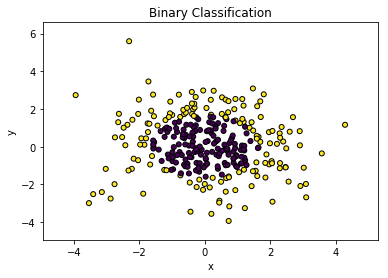

In [42]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary Classification')
plt.show()

### Boosting

In [ ]:
#rounds 

In [ ]:
#weakLearner

In [ ]:
# take the sign of the hypothesis
def sign(x):
    return 1 if x >= 0 else -1

In [ ]:
# normalize a distribution
def normalize(weights):
    norm = sum(weights)
    return tuple(m / norm for m in weights)

In [45]:
# compute the weighted error of a given hypothesis on a distribution
def computeError(h, examples, weights=None):
    if weights is None:
        weights = [1.] * len(examples)
        
    hypothesis = [h(x)*y for (x,y) in examples] # +1 if correct, else -1
    return hypothesis, sum(w for (z,w) in zip(hypothesis, weights) if z < 0)

In [ ]:
def boost(examples, weakLearner, rounds):
    distr = normalize([1.] * len(examples))
    hypotheses = [None] * rounds
    alpha = [0] * rounds
    
    for t in range(rounds):
        # 1 choose classifier
        def drawExample():
            return examples[draw(distr)]
        
        hypotheses[t] = weakLearner(drawExample)
        hypothesis, error = computeError(hypotheses[t], examples, distr)
        
        alpha[t] = 0.5 * math.log((1 - error) / (.0001 + error))
        distr = normalize([d * math.exp(-alpha[t] * h)
                           for (d,h) in zip(distr, hypothesis)])
        
        print("Round %d, error %.3f" % (t, error))
        
    def finalHypothesis(x):
        return sign(sum(a * h(x) for (a,h) in zip(alpha, hypotheses)))
 
   return finalHypothesis